In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from torch.optim.lr_scheduler import CosineAnnealingLR


from config import VitConfig
from model import VisionTransformer

In [2]:
import importlib
import model, config
importlib.reload(config)
importlib.reload(model)

from config import VitConfig
from model import VisionTransformer


In [3]:
config = VitConfig()
model = VisionTransformer(config)

In [4]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((config.img_size,config.img_size))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Create DataLoader for training and testing datasets
train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=config.batch_size, shuffle=False, num_workers=4)

In [ ]:
#CIFAR labels to human readable labels
CIFAR10_CLASSES = [
    'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]
data = next(iter(train_loader))
images, labels = data

# Check the shape of the images and labels
print(f'Images shape: {images.shape}')
print(f'Labels shape: {labels.shape}')

#decode the first image

def imshow(img):
    npimg = img.numpy()
    plt.figure(figsize=(2, 2))  # keep this small to avoid blur
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')  # no interpolation
    plt.axis('off')
    plt.show()
print(CIFAR10_CLASSES[labels[0].item()])
print(images[0])
imshow(images[0])

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()
num_epochs = 50
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs * len(train_loader), eta_min=1e-6)
print(device)


cuda


In [19]:
def train_epoch(epoch):
    model.train()
    total_loss = 0.0
    iter = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
        print(f"[Epoch {epoch + 1}] Training Batch [{iter + 1}/{len(train_loader)}]: Loss {loss.item()}")
        iter += 1
    return total_loss / len(train_loader)

In [20]:
for epoch in range(num_epochs):
    print(f"*********  Epoch {epoch + 1}/{num_epochs}  *********")
    train_loss = train_epoch(epoch)
    print(f"Epoch {epoch + 1} - Train Loss: {train_loss:.4f}")
    torch.save(model.state_dict(), "vit-s.pth")

*********  Epoch 1/50  *********


/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 1] Training Batch [1/391]: Loss 2.6821706295013428
[Epoch 1] Training Batch [2/391]: Loss 4.082300186157227
[Epoch 1] Training Batch [3/391]: Loss 5.352705001831055
[Epoch 1] Training Batch [4/391]: Loss 4.727759838104248
[Epoch 1] Training Batch [5/391]: Loss 4.957481861114502
[Epoch 1] Training Batch [6/391]: Loss 4.103341102600098
[Epoch 1] Training Batch [7/391]: Loss 3.6007978916168213
[Epoch 1] Training Batch [8/391]: Loss 3.0070228576660156
[Epoch 1] Training Batch [9/391]: Loss 2.9414572715759277
[Epoch 1] Training Batch [10/391]: Loss 3.197847366333008
[Epoch 1] Training Batch [11/391]: Loss 2.878739833831787
[Epoch 1] Training Batch [12/391]: Loss 2.665365219116211
[Epoch 1] Training Batch [13/391]: Loss 2.511077880859375
[Epoch 1] Training Batch [14/391]: Loss 2.4874930381774902
[Epoch 1] Training Batch [15/391]: Loss 2.4537875652313232
[Epoch 1] Training Batch [16/391]: Loss 2.3713698387145996
[Epoch 1] Training Batch [17/391]: Loss 2.681516647338867
[Epoch 1] Traini

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 2] Training Batch [1/391]: Loss 1.670844316482544
[Epoch 2] Training Batch [2/391]: Loss 1.7542189359664917
[Epoch 2] Training Batch [3/391]: Loss 1.8448328971862793
[Epoch 2] Training Batch [4/391]: Loss 1.6357768774032593
[Epoch 2] Training Batch [5/391]: Loss 1.7511875629425049
[Epoch 2] Training Batch [6/391]: Loss 1.7241209745407104
[Epoch 2] Training Batch [7/391]: Loss 1.5796761512756348
[Epoch 2] Training Batch [8/391]: Loss 1.5920685529708862
[Epoch 2] Training Batch [9/391]: Loss 1.7541483640670776
[Epoch 2] Training Batch [10/391]: Loss 1.7185919284820557
[Epoch 2] Training Batch [11/391]: Loss 1.7704540491104126
[Epoch 2] Training Batch [12/391]: Loss 1.6501933336257935
[Epoch 2] Training Batch [13/391]: Loss 1.7082444429397583
[Epoch 2] Training Batch [14/391]: Loss 1.775173544883728
[Epoch 2] Training Batch [15/391]: Loss 1.850807547569275
[Epoch 2] Training Batch [16/391]: Loss 1.700176477432251
[Epoch 2] Training Batch [17/391]: Loss 1.6954054832458496
[Epoch 2] 

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 3] Training Batch [1/391]: Loss 1.3515568971633911
[Epoch 3] Training Batch [2/391]: Loss 1.554766297340393
[Epoch 3] Training Batch [3/391]: Loss 1.345585584640503
[Epoch 3] Training Batch [4/391]: Loss 1.525038719177246
[Epoch 3] Training Batch [5/391]: Loss 1.4567469358444214
[Epoch 3] Training Batch [6/391]: Loss 1.261030673980713
[Epoch 3] Training Batch [7/391]: Loss 1.4140222072601318
[Epoch 3] Training Batch [8/391]: Loss 1.3919998407363892
[Epoch 3] Training Batch [9/391]: Loss 1.4566571712493896
[Epoch 3] Training Batch [10/391]: Loss 1.475289225578308
[Epoch 3] Training Batch [11/391]: Loss 1.4317057132720947
[Epoch 3] Training Batch [12/391]: Loss 1.3349323272705078
[Epoch 3] Training Batch [13/391]: Loss 1.3496602773666382
[Epoch 3] Training Batch [14/391]: Loss 1.3356904983520508
[Epoch 3] Training Batch [15/391]: Loss 1.3073848485946655
[Epoch 3] Training Batch [16/391]: Loss 1.4730943441390991
[Epoch 3] Training Batch [17/391]: Loss 1.3368743658065796
[Epoch 3] T

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 4] Training Batch [1/391]: Loss 1.243931770324707
[Epoch 4] Training Batch [2/391]: Loss 1.4076707363128662
[Epoch 4] Training Batch [3/391]: Loss 1.2688733339309692
[Epoch 4] Training Batch [4/391]: Loss 1.2243653535842896
[Epoch 4] Training Batch [5/391]: Loss 1.1586912870407104
[Epoch 4] Training Batch [6/391]: Loss 1.2769136428833008
[Epoch 4] Training Batch [7/391]: Loss 1.337611198425293
[Epoch 4] Training Batch [8/391]: Loss 1.1460009813308716
[Epoch 4] Training Batch [9/391]: Loss 1.4144126176834106
[Epoch 4] Training Batch [10/391]: Loss 1.1626019477844238
[Epoch 4] Training Batch [11/391]: Loss 1.4085664749145508
[Epoch 4] Training Batch [12/391]: Loss 1.3495464324951172
[Epoch 4] Training Batch [13/391]: Loss 1.350993275642395
[Epoch 4] Training Batch [14/391]: Loss 1.292736530303955
[Epoch 4] Training Batch [15/391]: Loss 1.3950531482696533
[Epoch 4] Training Batch [16/391]: Loss 1.1984786987304688
[Epoch 4] Training Batch [17/391]: Loss 1.1746869087219238
[Epoch 4] 

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 5] Training Batch [1/391]: Loss 1.197948694229126
[Epoch 5] Training Batch [2/391]: Loss 1.0287623405456543
[Epoch 5] Training Batch [3/391]: Loss 1.3504419326782227
[Epoch 5] Training Batch [4/391]: Loss 1.2958003282546997
[Epoch 5] Training Batch [5/391]: Loss 1.169813632965088
[Epoch 5] Training Batch [6/391]: Loss 1.1898884773254395
[Epoch 5] Training Batch [7/391]: Loss 1.1018309593200684
[Epoch 5] Training Batch [8/391]: Loss 1.2262991666793823
[Epoch 5] Training Batch [9/391]: Loss 1.0983585119247437
[Epoch 5] Training Batch [10/391]: Loss 1.1445106267929077
[Epoch 5] Training Batch [11/391]: Loss 1.1845027208328247
[Epoch 5] Training Batch [12/391]: Loss 1.0376908779144287
[Epoch 5] Training Batch [13/391]: Loss 1.1797701120376587
[Epoch 5] Training Batch [14/391]: Loss 1.0520223379135132
[Epoch 5] Training Batch [15/391]: Loss 1.1754807233810425
[Epoch 5] Training Batch [16/391]: Loss 1.2090295553207397
[Epoch 5] Training Batch [17/391]: Loss 1.1009875535964966
[Epoch 5

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 6] Training Batch [1/391]: Loss 1.0080205202102661
[Epoch 6] Training Batch [2/391]: Loss 0.9994816184043884
[Epoch 6] Training Batch [3/391]: Loss 1.1089075803756714
[Epoch 6] Training Batch [4/391]: Loss 1.117517113685608
[Epoch 6] Training Batch [5/391]: Loss 1.0434726476669312
[Epoch 6] Training Batch [6/391]: Loss 1.0470333099365234
[Epoch 6] Training Batch [7/391]: Loss 0.945847749710083
[Epoch 6] Training Batch [8/391]: Loss 0.8947212100028992
[Epoch 6] Training Batch [9/391]: Loss 0.9699001908302307
[Epoch 6] Training Batch [10/391]: Loss 1.1305736303329468
[Epoch 6] Training Batch [11/391]: Loss 1.0989586114883423
[Epoch 6] Training Batch [12/391]: Loss 1.0550801753997803
[Epoch 6] Training Batch [13/391]: Loss 0.9522677659988403
[Epoch 6] Training Batch [14/391]: Loss 1.0374261140823364
[Epoch 6] Training Batch [15/391]: Loss 1.0158404111862183
[Epoch 6] Training Batch [16/391]: Loss 1.1726561784744263
[Epoch 6] Training Batch [17/391]: Loss 0.8479812741279602
[Epoch 6

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 7] Training Batch [1/391]: Loss 0.8005222678184509
[Epoch 7] Training Batch [2/391]: Loss 0.7274554967880249
[Epoch 7] Training Batch [3/391]: Loss 0.91389000415802
[Epoch 7] Training Batch [4/391]: Loss 0.9041489362716675
[Epoch 7] Training Batch [5/391]: Loss 0.8985210657119751
[Epoch 7] Training Batch [6/391]: Loss 0.8238974809646606
[Epoch 7] Training Batch [7/391]: Loss 0.924004316329956
[Epoch 7] Training Batch [8/391]: Loss 0.9093354940414429
[Epoch 7] Training Batch [9/391]: Loss 0.8107783794403076
[Epoch 7] Training Batch [10/391]: Loss 0.9782531261444092
[Epoch 7] Training Batch [11/391]: Loss 0.8974781036376953
[Epoch 7] Training Batch [12/391]: Loss 0.9016931653022766
[Epoch 7] Training Batch [13/391]: Loss 0.8502336740493774
[Epoch 7] Training Batch [14/391]: Loss 0.7806856036186218
[Epoch 7] Training Batch [15/391]: Loss 0.7061140537261963
[Epoch 7] Training Batch [16/391]: Loss 0.9065248966217041
[Epoch 7] Training Batch [17/391]: Loss 0.9249423146247864
[Epoch 7]

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 8] Training Batch [1/391]: Loss 0.8111995458602905
[Epoch 8] Training Batch [2/391]: Loss 0.77215176820755
[Epoch 8] Training Batch [3/391]: Loss 0.8638419508934021
[Epoch 8] Training Batch [4/391]: Loss 0.6667277216911316
[Epoch 8] Training Batch [5/391]: Loss 0.6346719264984131
[Epoch 8] Training Batch [6/391]: Loss 0.7777184844017029
[Epoch 8] Training Batch [7/391]: Loss 0.8061527013778687
[Epoch 8] Training Batch [8/391]: Loss 0.7493369579315186
[Epoch 8] Training Batch [9/391]: Loss 0.7582728862762451
[Epoch 8] Training Batch [10/391]: Loss 0.7265280485153198
[Epoch 8] Training Batch [11/391]: Loss 0.8179172277450562
[Epoch 8] Training Batch [12/391]: Loss 0.7410017251968384
[Epoch 8] Training Batch [13/391]: Loss 0.6426675319671631
[Epoch 8] Training Batch [14/391]: Loss 0.827778160572052
[Epoch 8] Training Batch [15/391]: Loss 0.6474661231040955
[Epoch 8] Training Batch [16/391]: Loss 0.7816386222839355
[Epoch 8] Training Batch [17/391]: Loss 0.7845315337181091
[Epoch 8]

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 9] Training Batch [1/391]: Loss 0.5784754753112793
[Epoch 9] Training Batch [2/391]: Loss 0.5821475386619568
[Epoch 9] Training Batch [3/391]: Loss 0.9233373999595642
[Epoch 9] Training Batch [4/391]: Loss 0.777725338935852
[Epoch 9] Training Batch [5/391]: Loss 0.744808554649353
[Epoch 9] Training Batch [6/391]: Loss 0.6728922128677368
[Epoch 9] Training Batch [7/391]: Loss 0.7102153897285461
[Epoch 9] Training Batch [8/391]: Loss 0.7013867497444153
[Epoch 9] Training Batch [9/391]: Loss 0.5240636467933655
[Epoch 9] Training Batch [10/391]: Loss 0.60550856590271
[Epoch 9] Training Batch [11/391]: Loss 0.59844970703125
[Epoch 9] Training Batch [12/391]: Loss 0.5093575119972229
[Epoch 9] Training Batch [13/391]: Loss 0.8235239386558533
[Epoch 9] Training Batch [14/391]: Loss 0.6092908382415771
[Epoch 9] Training Batch [15/391]: Loss 0.6552091836929321
[Epoch 9] Training Batch [16/391]: Loss 0.8064996600151062
[Epoch 9] Training Batch [17/391]: Loss 0.587044358253479
[Epoch 9] Tra

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 10] Training Batch [1/391]: Loss 0.500386655330658
[Epoch 10] Training Batch [2/391]: Loss 0.5507825613021851
[Epoch 10] Training Batch [3/391]: Loss 0.4546099305152893
[Epoch 10] Training Batch [4/391]: Loss 0.5751065015792847
[Epoch 10] Training Batch [5/391]: Loss 0.5745784640312195
[Epoch 10] Training Batch [6/391]: Loss 0.5720474720001221
[Epoch 10] Training Batch [7/391]: Loss 0.43374475836753845
[Epoch 10] Training Batch [8/391]: Loss 0.6708759665489197
[Epoch 10] Training Batch [9/391]: Loss 0.4794216752052307
[Epoch 10] Training Batch [10/391]: Loss 0.490412175655365
[Epoch 10] Training Batch [11/391]: Loss 0.4893864393234253
[Epoch 10] Training Batch [12/391]: Loss 0.3681422173976898
[Epoch 10] Training Batch [13/391]: Loss 0.5403014421463013
[Epoch 10] Training Batch [14/391]: Loss 0.4782205820083618
[Epoch 10] Training Batch [15/391]: Loss 0.3758096396923065
[Epoch 10] Training Batch [16/391]: Loss 0.3781631290912628
[Epoch 10] Training Batch [17/391]: Loss 0.6079239

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 11] Training Batch [1/391]: Loss 0.36584192514419556
[Epoch 11] Training Batch [2/391]: Loss 0.4197249710559845
[Epoch 11] Training Batch [3/391]: Loss 0.3881753385066986
[Epoch 11] Training Batch [4/391]: Loss 0.3751499056816101
[Epoch 11] Training Batch [5/391]: Loss 0.4094559848308563
[Epoch 11] Training Batch [6/391]: Loss 0.3656691014766693
[Epoch 11] Training Batch [7/391]: Loss 0.5077350735664368
[Epoch 11] Training Batch [8/391]: Loss 0.42855215072631836
[Epoch 11] Training Batch [9/391]: Loss 0.4542821943759918
[Epoch 11] Training Batch [10/391]: Loss 0.4378395974636078
[Epoch 11] Training Batch [11/391]: Loss 0.43011584877967834
[Epoch 11] Training Batch [12/391]: Loss 0.4617672264575958
[Epoch 11] Training Batch [13/391]: Loss 0.26238569617271423
[Epoch 11] Training Batch [14/391]: Loss 0.3477122485637665
[Epoch 11] Training Batch [15/391]: Loss 0.37194448709487915
[Epoch 11] Training Batch [16/391]: Loss 0.23598822951316833
[Epoch 11] Training Batch [17/391]: Loss 0.

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 12] Training Batch [1/391]: Loss 0.3186119496822357
[Epoch 12] Training Batch [2/391]: Loss 0.3156477212905884
[Epoch 12] Training Batch [3/391]: Loss 0.26486530900001526
[Epoch 12] Training Batch [4/391]: Loss 0.27468112111091614
[Epoch 12] Training Batch [5/391]: Loss 0.2627268433570862
[Epoch 12] Training Batch [6/391]: Loss 0.23429535329341888
[Epoch 12] Training Batch [7/391]: Loss 0.3554045855998993
[Epoch 12] Training Batch [8/391]: Loss 0.2565765380859375
[Epoch 12] Training Batch [9/391]: Loss 0.29742157459259033
[Epoch 12] Training Batch [10/391]: Loss 0.24461548030376434
[Epoch 12] Training Batch [11/391]: Loss 0.2778744697570801
[Epoch 12] Training Batch [12/391]: Loss 0.3960740268230438
[Epoch 12] Training Batch [13/391]: Loss 0.25632163882255554
[Epoch 12] Training Batch [14/391]: Loss 0.2953110337257385
[Epoch 12] Training Batch [15/391]: Loss 0.2884427309036255
[Epoch 12] Training Batch [16/391]: Loss 0.3382451832294464
[Epoch 12] Training Batch [17/391]: Loss 0.

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 13] Training Batch [1/391]: Loss 0.2767435610294342
[Epoch 13] Training Batch [2/391]: Loss 0.19772011041641235
[Epoch 13] Training Batch [3/391]: Loss 0.17127177119255066
[Epoch 13] Training Batch [4/391]: Loss 0.18533627688884735
[Epoch 13] Training Batch [5/391]: Loss 0.19947059452533722
[Epoch 13] Training Batch [6/391]: Loss 0.24485641717910767
[Epoch 13] Training Batch [7/391]: Loss 0.22169248759746552
[Epoch 13] Training Batch [8/391]: Loss 0.22879746556282043
[Epoch 13] Training Batch [9/391]: Loss 0.11215084791183472
[Epoch 13] Training Batch [10/391]: Loss 0.24086163938045502
[Epoch 13] Training Batch [11/391]: Loss 0.15929193794727325
[Epoch 13] Training Batch [12/391]: Loss 0.15442928671836853
[Epoch 13] Training Batch [13/391]: Loss 0.22383375465869904
[Epoch 13] Training Batch [14/391]: Loss 0.14631812274456024
[Epoch 13] Training Batch [15/391]: Loss 0.18617992103099823
[Epoch 13] Training Batch [16/391]: Loss 0.15707868337631226
[Epoch 13] Training Batch [17/391]

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 14] Training Batch [1/391]: Loss 0.15841686725616455
[Epoch 14] Training Batch [2/391]: Loss 0.13790588080883026
[Epoch 14] Training Batch [3/391]: Loss 0.16071461141109467
[Epoch 14] Training Batch [4/391]: Loss 0.15973550081253052
[Epoch 14] Training Batch [5/391]: Loss 0.1524011641740799
[Epoch 14] Training Batch [6/391]: Loss 0.19381257891654968
[Epoch 14] Training Batch [7/391]: Loss 0.14181068539619446
[Epoch 14] Training Batch [8/391]: Loss 0.15576618909835815
[Epoch 14] Training Batch [9/391]: Loss 0.1197042465209961
[Epoch 14] Training Batch [10/391]: Loss 0.11591769754886627
[Epoch 14] Training Batch [11/391]: Loss 0.26950156688690186
[Epoch 14] Training Batch [12/391]: Loss 0.14873571693897247
[Epoch 14] Training Batch [13/391]: Loss 0.08815205097198486
[Epoch 14] Training Batch [14/391]: Loss 0.1078106090426445
[Epoch 14] Training Batch [15/391]: Loss 0.11874443292617798
[Epoch 14] Training Batch [16/391]: Loss 0.1738172471523285
[Epoch 14] Training Batch [17/391]: L

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 15] Training Batch [1/391]: Loss 0.15912266075611115
[Epoch 15] Training Batch [2/391]: Loss 0.09048539400100708
[Epoch 15] Training Batch [3/391]: Loss 0.12007459253072739
[Epoch 15] Training Batch [4/391]: Loss 0.06581619381904602
[Epoch 15] Training Batch [5/391]: Loss 0.1185002326965332
[Epoch 15] Training Batch [6/391]: Loss 0.08180119097232819
[Epoch 15] Training Batch [7/391]: Loss 0.1962413787841797
[Epoch 15] Training Batch [8/391]: Loss 0.09527090191841125
[Epoch 15] Training Batch [9/391]: Loss 0.11329980194568634
[Epoch 15] Training Batch [10/391]: Loss 0.09027640521526337
[Epoch 15] Training Batch [11/391]: Loss 0.13583128154277802
[Epoch 15] Training Batch [12/391]: Loss 0.07528124749660492
[Epoch 15] Training Batch [13/391]: Loss 0.10143575072288513
[Epoch 15] Training Batch [14/391]: Loss 0.11351998895406723
[Epoch 15] Training Batch [15/391]: Loss 0.08804120123386383
[Epoch 15] Training Batch [16/391]: Loss 0.07062996923923492
[Epoch 15] Training Batch [17/391]:

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 16] Training Batch [1/391]: Loss 0.06739587336778641
[Epoch 16] Training Batch [2/391]: Loss 0.05412084981799126
[Epoch 16] Training Batch [3/391]: Loss 0.10397162288427353
[Epoch 16] Training Batch [4/391]: Loss 0.1278293877840042
[Epoch 16] Training Batch [5/391]: Loss 0.079594187438488
[Epoch 16] Training Batch [6/391]: Loss 0.09774287045001984
[Epoch 16] Training Batch [7/391]: Loss 0.06108584627509117
[Epoch 16] Training Batch [8/391]: Loss 0.10947678983211517
[Epoch 16] Training Batch [9/391]: Loss 0.09977570921182632
[Epoch 16] Training Batch [10/391]: Loss 0.15840817987918854
[Epoch 16] Training Batch [11/391]: Loss 0.07161542773246765
[Epoch 16] Training Batch [12/391]: Loss 0.10495984554290771
[Epoch 16] Training Batch [13/391]: Loss 0.19715748727321625
[Epoch 16] Training Batch [14/391]: Loss 0.1394309103488922
[Epoch 16] Training Batch [15/391]: Loss 0.0584852434694767
[Epoch 16] Training Batch [16/391]: Loss 0.05212635546922684
[Epoch 16] Training Batch [17/391]: Lo

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 17] Training Batch [1/391]: Loss 0.04371481388807297
[Epoch 17] Training Batch [2/391]: Loss 0.04141947999596596
[Epoch 17] Training Batch [3/391]: Loss 0.1572439819574356
[Epoch 17] Training Batch [4/391]: Loss 0.06798053532838821
[Epoch 17] Training Batch [5/391]: Loss 0.033392611891031265
[Epoch 17] Training Batch [6/391]: Loss 0.047431860119104385
[Epoch 17] Training Batch [7/391]: Loss 0.06399460881948471
[Epoch 17] Training Batch [8/391]: Loss 0.05043826252222061
[Epoch 17] Training Batch [9/391]: Loss 0.06817791610956192
[Epoch 17] Training Batch [10/391]: Loss 0.0477786548435688
[Epoch 17] Training Batch [11/391]: Loss 0.06144389137625694
[Epoch 17] Training Batch [12/391]: Loss 0.14570797979831696
[Epoch 17] Training Batch [13/391]: Loss 0.06265470385551453
[Epoch 17] Training Batch [14/391]: Loss 0.07035751640796661
[Epoch 17] Training Batch [15/391]: Loss 0.05307637155056
[Epoch 17] Training Batch [16/391]: Loss 0.13282033801078796
[Epoch 17] Training Batch [17/391]: 

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 18] Training Batch [1/391]: Loss 0.0753987580537796
[Epoch 18] Training Batch [2/391]: Loss 0.06262655556201935
[Epoch 18] Training Batch [3/391]: Loss 0.08046569675207138
[Epoch 18] Training Batch [4/391]: Loss 0.04117380455136299
[Epoch 18] Training Batch [5/391]: Loss 0.06655854731798172
[Epoch 18] Training Batch [6/391]: Loss 0.10602268576622009
[Epoch 18] Training Batch [7/391]: Loss 0.12579119205474854
[Epoch 18] Training Batch [8/391]: Loss 0.09246480464935303
[Epoch 18] Training Batch [9/391]: Loss 0.0534328930079937
[Epoch 18] Training Batch [10/391]: Loss 0.12067053467035294
[Epoch 18] Training Batch [11/391]: Loss 0.05964356288313866
[Epoch 18] Training Batch [12/391]: Loss 0.024073151871562004
[Epoch 18] Training Batch [13/391]: Loss 0.05317484959959984
[Epoch 18] Training Batch [14/391]: Loss 0.03882042318582535
[Epoch 18] Training Batch [15/391]: Loss 0.08861877769231796
[Epoch 18] Training Batch [16/391]: Loss 0.04169779643416405
[Epoch 18] Training Batch [17/391]

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 19] Training Batch [1/391]: Loss 0.012246513739228249
[Epoch 19] Training Batch [2/391]: Loss 0.02566559426486492
[Epoch 19] Training Batch [3/391]: Loss 0.06745947897434235
[Epoch 19] Training Batch [4/391]: Loss 0.07634414732456207
[Epoch 19] Training Batch [5/391]: Loss 0.0825151577591896
[Epoch 19] Training Batch [6/391]: Loss 0.02697940729558468
[Epoch 19] Training Batch [7/391]: Loss 0.024334611371159554
[Epoch 19] Training Batch [8/391]: Loss 0.02217920497059822
[Epoch 19] Training Batch [9/391]: Loss 0.02381805330514908
[Epoch 19] Training Batch [10/391]: Loss 0.06471636146306992
[Epoch 19] Training Batch [11/391]: Loss 0.05952691286802292
[Epoch 19] Training Batch [12/391]: Loss 0.06808566302061081
[Epoch 19] Training Batch [13/391]: Loss 0.016424821689724922
[Epoch 19] Training Batch [14/391]: Loss 0.06376682221889496
[Epoch 19] Training Batch [15/391]: Loss 0.1685643196105957
[Epoch 19] Training Batch [16/391]: Loss 0.016079965978860855
[Epoch 19] Training Batch [17/3

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 20] Training Batch [1/391]: Loss 0.04059644788503647
[Epoch 20] Training Batch [2/391]: Loss 0.05476895347237587
[Epoch 20] Training Batch [3/391]: Loss 0.057318270206451416
[Epoch 20] Training Batch [4/391]: Loss 0.044653672724962234
[Epoch 20] Training Batch [5/391]: Loss 0.053368862718343735
[Epoch 20] Training Batch [6/391]: Loss 0.04361814633011818
[Epoch 20] Training Batch [7/391]: Loss 0.014313331805169582
[Epoch 20] Training Batch [8/391]: Loss 0.053871747106313705
[Epoch 20] Training Batch [9/391]: Loss 0.06674593687057495
[Epoch 20] Training Batch [10/391]: Loss 0.029755303636193275
[Epoch 20] Training Batch [11/391]: Loss 0.03417900204658508
[Epoch 20] Training Batch [12/391]: Loss 0.018899017944931984
[Epoch 20] Training Batch [13/391]: Loss 0.1010754182934761
[Epoch 20] Training Batch [14/391]: Loss 0.016501449048519135
[Epoch 20] Training Batch [15/391]: Loss 0.04755678400397301
[Epoch 20] Training Batch [16/391]: Loss 0.008112398907542229
[Epoch 20] Training Batch

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 21] Training Batch [1/391]: Loss 0.054184023290872574
[Epoch 21] Training Batch [2/391]: Loss 0.10907404869794846
[Epoch 21] Training Batch [3/391]: Loss 0.03470655530691147
[Epoch 21] Training Batch [4/391]: Loss 0.018230168148875237
[Epoch 21] Training Batch [5/391]: Loss 0.09154335409402847
[Epoch 21] Training Batch [6/391]: Loss 0.0375954769551754
[Epoch 21] Training Batch [7/391]: Loss 0.012044049799442291
[Epoch 21] Training Batch [8/391]: Loss 0.021473702043294907
[Epoch 21] Training Batch [9/391]: Loss 0.027712445706129074
[Epoch 21] Training Batch [10/391]: Loss 0.05815498158335686
[Epoch 21] Training Batch [11/391]: Loss 0.10321967303752899
[Epoch 21] Training Batch [12/391]: Loss 0.04052148386836052
[Epoch 21] Training Batch [13/391]: Loss 0.08643976598978043
[Epoch 21] Training Batch [14/391]: Loss 0.06299031525850296
[Epoch 21] Training Batch [15/391]: Loss 0.04264148697257042
[Epoch 21] Training Batch [16/391]: Loss 0.02061256766319275
[Epoch 21] Training Batch [17

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 22] Training Batch [1/391]: Loss 0.01368353608995676
[Epoch 22] Training Batch [2/391]: Loss 0.015685103833675385
[Epoch 22] Training Batch [3/391]: Loss 0.007712800987064838
[Epoch 22] Training Batch [4/391]: Loss 0.048216186463832855
[Epoch 22] Training Batch [5/391]: Loss 0.02750631608068943
[Epoch 22] Training Batch [6/391]: Loss 0.04015589877963066
[Epoch 22] Training Batch [7/391]: Loss 0.030030444264411926
[Epoch 22] Training Batch [8/391]: Loss 0.04147251322865486
[Epoch 22] Training Batch [9/391]: Loss 0.052536942064762115
[Epoch 22] Training Batch [10/391]: Loss 0.021090012043714523
[Epoch 22] Training Batch [11/391]: Loss 0.040313031524419785
[Epoch 22] Training Batch [12/391]: Loss 0.05843886360526085
[Epoch 22] Training Batch [13/391]: Loss 0.028100695461034775
[Epoch 22] Training Batch [14/391]: Loss 0.022758252918720245
[Epoch 22] Training Batch [15/391]: Loss 0.010099349543452263
[Epoch 22] Training Batch [16/391]: Loss 0.034872494637966156
[Epoch 22] Training Ba

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 23] Training Batch [1/391]: Loss 0.007916305214166641
[Epoch 23] Training Batch [2/391]: Loss 0.04580157995223999
[Epoch 23] Training Batch [3/391]: Loss 0.03475324064493179
[Epoch 23] Training Batch [4/391]: Loss 0.011642087250947952
[Epoch 23] Training Batch [5/391]: Loss 0.019965585321187973
[Epoch 23] Training Batch [6/391]: Loss 0.04312997683882713
[Epoch 23] Training Batch [7/391]: Loss 0.02722429484128952
[Epoch 23] Training Batch [8/391]: Loss 0.02919561043381691
[Epoch 23] Training Batch [9/391]: Loss 0.009669966995716095
[Epoch 23] Training Batch [10/391]: Loss 0.008437363430857658
[Epoch 23] Training Batch [11/391]: Loss 0.057580508291721344
[Epoch 23] Training Batch [12/391]: Loss 0.027574272826313972
[Epoch 23] Training Batch [13/391]: Loss 0.03326089680194855
[Epoch 23] Training Batch [14/391]: Loss 0.013493125326931477
[Epoch 23] Training Batch [15/391]: Loss 0.015630921348929405
[Epoch 23] Training Batch [16/391]: Loss 0.010311529971659184
[Epoch 23] Training Bat

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 24] Training Batch [1/391]: Loss 0.03565297648310661
[Epoch 24] Training Batch [2/391]: Loss 0.042636558413505554
[Epoch 24] Training Batch [3/391]: Loss 0.01240624487400055
[Epoch 24] Training Batch [4/391]: Loss 0.01894160732626915
[Epoch 24] Training Batch [5/391]: Loss 0.03364543616771698
[Epoch 24] Training Batch [6/391]: Loss 0.008865433745086193
[Epoch 24] Training Batch [7/391]: Loss 0.015715982764959335
[Epoch 24] Training Batch [8/391]: Loss 0.010948363691568375
[Epoch 24] Training Batch [9/391]: Loss 0.03664816543459892
[Epoch 24] Training Batch [10/391]: Loss 0.034239280968904495
[Epoch 24] Training Batch [11/391]: Loss 0.07932751625776291
[Epoch 24] Training Batch [12/391]: Loss 0.014947442337870598
[Epoch 24] Training Batch [13/391]: Loss 0.07111652940511703
[Epoch 24] Training Batch [14/391]: Loss 0.0037631129380315542
[Epoch 24] Training Batch [15/391]: Loss 0.06686590611934662
[Epoch 24] Training Batch [16/391]: Loss 0.02489154040813446
[Epoch 24] Training Batch

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 25] Training Batch [1/391]: Loss 0.030948400497436523
[Epoch 25] Training Batch [2/391]: Loss 0.02694191224873066
[Epoch 25] Training Batch [3/391]: Loss 0.04311038926243782
[Epoch 25] Training Batch [4/391]: Loss 0.0302165225148201
[Epoch 25] Training Batch [5/391]: Loss 0.035301294177770615
[Epoch 25] Training Batch [6/391]: Loss 0.017243770882487297
[Epoch 25] Training Batch [7/391]: Loss 0.04840196669101715
[Epoch 25] Training Batch [8/391]: Loss 0.003249258501455188
[Epoch 25] Training Batch [9/391]: Loss 0.021060649305582047
[Epoch 25] Training Batch [10/391]: Loss 0.016933823004364967
[Epoch 25] Training Batch [11/391]: Loss 0.022006459534168243
[Epoch 25] Training Batch [12/391]: Loss 0.01124074961990118
[Epoch 25] Training Batch [13/391]: Loss 0.013248216360807419
[Epoch 25] Training Batch [14/391]: Loss 0.021284008398652077
[Epoch 25] Training Batch [15/391]: Loss 0.03503275290131569
[Epoch 25] Training Batch [16/391]: Loss 0.031727954745292664
[Epoch 25] Training Batc

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 26] Training Batch [1/391]: Loss 0.011598403565585613
[Epoch 26] Training Batch [2/391]: Loss 0.026510411873459816
[Epoch 26] Training Batch [3/391]: Loss 0.01504573505371809
[Epoch 26] Training Batch [4/391]: Loss 0.009679010137915611
[Epoch 26] Training Batch [5/391]: Loss 0.025487298145890236
[Epoch 26] Training Batch [6/391]: Loss 0.004576801788061857
[Epoch 26] Training Batch [7/391]: Loss 0.028284255415201187
[Epoch 26] Training Batch [8/391]: Loss 0.038976140320301056
[Epoch 26] Training Batch [9/391]: Loss 0.0043127210810780525
[Epoch 26] Training Batch [10/391]: Loss 0.0034566805697977543
[Epoch 26] Training Batch [11/391]: Loss 0.02435850352048874
[Epoch 26] Training Batch [12/391]: Loss 0.016242627054452896
[Epoch 26] Training Batch [13/391]: Loss 0.011749965138733387
[Epoch 26] Training Batch [14/391]: Loss 0.012972850352525711
[Epoch 26] Training Batch [15/391]: Loss 0.00567806838080287
[Epoch 26] Training Batch [16/391]: Loss 0.012923196889460087
[Epoch 26] Trainin

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 27] Training Batch [1/391]: Loss 0.003978149499744177
[Epoch 27] Training Batch [2/391]: Loss 0.0024844908621162176
[Epoch 27] Training Batch [3/391]: Loss 0.001852724002674222
[Epoch 27] Training Batch [4/391]: Loss 0.00181351020000875
[Epoch 27] Training Batch [5/391]: Loss 0.0012302768882364035
[Epoch 27] Training Batch [6/391]: Loss 0.0012442403240129352
[Epoch 27] Training Batch [7/391]: Loss 0.0016559370560571551
[Epoch 27] Training Batch [8/391]: Loss 0.005308771040290594
[Epoch 27] Training Batch [9/391]: Loss 0.013104347512125969
[Epoch 27] Training Batch [10/391]: Loss 0.001881855889223516
[Epoch 27] Training Batch [11/391]: Loss 0.0037226637359708548
[Epoch 27] Training Batch [12/391]: Loss 0.003938120324164629
[Epoch 27] Training Batch [13/391]: Loss 0.003913951106369495
[Epoch 27] Training Batch [14/391]: Loss 0.002616900485008955
[Epoch 27] Training Batch [15/391]: Loss 0.002252088161185384
[Epoch 27] Training Batch [16/391]: Loss 0.0067483801394701
[Epoch 27] Trai

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 28] Training Batch [1/391]: Loss 0.005906716454774141
[Epoch 28] Training Batch [2/391]: Loss 0.0007120922673493624
[Epoch 28] Training Batch [3/391]: Loss 0.0013377501163631678
[Epoch 28] Training Batch [4/391]: Loss 0.0017294157296419144
[Epoch 28] Training Batch [5/391]: Loss 0.0010135405464097857
[Epoch 28] Training Batch [6/391]: Loss 0.003733233083039522
[Epoch 28] Training Batch [7/391]: Loss 0.002571077086031437
[Epoch 28] Training Batch [8/391]: Loss 0.02676190622150898
[Epoch 28] Training Batch [9/391]: Loss 0.00047554681077599525
[Epoch 28] Training Batch [10/391]: Loss 0.0030070601496845484
[Epoch 28] Training Batch [11/391]: Loss 0.0029714240226894617
[Epoch 28] Training Batch [12/391]: Loss 0.011622303165495396
[Epoch 28] Training Batch [13/391]: Loss 0.06117276847362518
[Epoch 28] Training Batch [14/391]: Loss 0.014141126535832882
[Epoch 28] Training Batch [15/391]: Loss 0.005737047176808119
[Epoch 28] Training Batch [16/391]: Loss 0.0032321636099368334
[Epoch 28]

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 29] Training Batch [1/391]: Loss 0.02399054728448391
[Epoch 29] Training Batch [2/391]: Loss 0.014909142628312111
[Epoch 29] Training Batch [3/391]: Loss 0.030027301982045174
[Epoch 29] Training Batch [4/391]: Loss 0.09344661980867386
[Epoch 29] Training Batch [5/391]: Loss 0.03628331050276756
[Epoch 29] Training Batch [6/391]: Loss 0.04650586098432541
[Epoch 29] Training Batch [7/391]: Loss 0.0125865014269948
[Epoch 29] Training Batch [8/391]: Loss 0.016663406044244766
[Epoch 29] Training Batch [9/391]: Loss 0.08694049715995789
[Epoch 29] Training Batch [10/391]: Loss 0.016764048486948013
[Epoch 29] Training Batch [11/391]: Loss 0.01802727021276951
[Epoch 29] Training Batch [12/391]: Loss 0.015603727661073208
[Epoch 29] Training Batch [13/391]: Loss 0.014570779167115688
[Epoch 29] Training Batch [14/391]: Loss 0.0468079149723053
[Epoch 29] Training Batch [15/391]: Loss 0.0614173524081707
[Epoch 29] Training Batch [16/391]: Loss 0.04293494671583176
[Epoch 29] Training Batch [17/

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 30] Training Batch [1/391]: Loss 0.0013445004587993026
[Epoch 30] Training Batch [2/391]: Loss 0.004691297188401222
[Epoch 30] Training Batch [3/391]: Loss 0.000561201071832329
[Epoch 30] Training Batch [4/391]: Loss 0.0012692715972661972
[Epoch 30] Training Batch [5/391]: Loss 0.00889219157397747
[Epoch 30] Training Batch [6/391]: Loss 0.006621664389967918
[Epoch 30] Training Batch [7/391]: Loss 0.00982052180916071
[Epoch 30] Training Batch [8/391]: Loss 0.006259569898247719
[Epoch 30] Training Batch [9/391]: Loss 0.0054356008768081665
[Epoch 30] Training Batch [10/391]: Loss 0.0015889396890997887
[Epoch 30] Training Batch [11/391]: Loss 0.0017322148196399212
[Epoch 30] Training Batch [12/391]: Loss 0.009411865845322609
[Epoch 30] Training Batch [13/391]: Loss 0.0008179934811778367
[Epoch 30] Training Batch [14/391]: Loss 0.015571234747767448
[Epoch 30] Training Batch [15/391]: Loss 0.0018013903172686696
[Epoch 30] Training Batch [16/391]: Loss 0.03090190328657627
[Epoch 30] Tr

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 31] Training Batch [1/391]: Loss 0.006794104818254709
[Epoch 31] Training Batch [2/391]: Loss 0.0011183375027030706
[Epoch 31] Training Batch [3/391]: Loss 0.0007732238154858351
[Epoch 31] Training Batch [4/391]: Loss 0.0014824345707893372
[Epoch 31] Training Batch [5/391]: Loss 0.0048453365452587605
[Epoch 31] Training Batch [6/391]: Loss 0.005534053314477205
[Epoch 31] Training Batch [7/391]: Loss 0.021530384197831154
[Epoch 31] Training Batch [8/391]: Loss 0.0015200760681182146
[Epoch 31] Training Batch [9/391]: Loss 0.05393184721469879
[Epoch 31] Training Batch [10/391]: Loss 0.0012181185884401202
[Epoch 31] Training Batch [11/391]: Loss 0.08413393050432205
[Epoch 31] Training Batch [12/391]: Loss 0.005757824517786503
[Epoch 31] Training Batch [13/391]: Loss 0.007284941151738167
[Epoch 31] Training Batch [14/391]: Loss 0.002381441416218877
[Epoch 31] Training Batch [15/391]: Loss 0.00819276925176382
[Epoch 31] Training Batch [16/391]: Loss 0.0006948801456019282
[Epoch 31] Tr

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 32] Training Batch [1/391]: Loss 0.0004325330664869398
[Epoch 32] Training Batch [2/391]: Loss 0.001042500720359385
[Epoch 32] Training Batch [3/391]: Loss 0.0011214015539735556
[Epoch 32] Training Batch [4/391]: Loss 0.0005921369884163141
[Epoch 32] Training Batch [5/391]: Loss 0.004748920910060406
[Epoch 32] Training Batch [6/391]: Loss 0.0033736582845449448
[Epoch 32] Training Batch [7/391]: Loss 0.000513021252118051
[Epoch 32] Training Batch [8/391]: Loss 0.0005980840069241822
[Epoch 32] Training Batch [9/391]: Loss 0.0012316468637436628
[Epoch 32] Training Batch [10/391]: Loss 0.0007758854189887643
[Epoch 32] Training Batch [11/391]: Loss 0.005512571427971125
[Epoch 32] Training Batch [12/391]: Loss 0.0010054206941276789
[Epoch 32] Training Batch [13/391]: Loss 0.0021433811634778976
[Epoch 32] Training Batch [14/391]: Loss 0.0018657381879165769
[Epoch 32] Training Batch [15/391]: Loss 0.00015818131214473397
[Epoch 32] Training Batch [16/391]: Loss 0.005161772016435862
[Epoc

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 33] Training Batch [1/391]: Loss 0.00019444036297500134
[Epoch 33] Training Batch [2/391]: Loss 0.0008123490260913968
[Epoch 33] Training Batch [3/391]: Loss 0.0006455474067479372
[Epoch 33] Training Batch [4/391]: Loss 0.0015317653305828571
[Epoch 33] Training Batch [5/391]: Loss 0.00449574226513505
[Epoch 33] Training Batch [6/391]: Loss 0.0013557685306295753
[Epoch 33] Training Batch [7/391]: Loss 0.001800547237507999
[Epoch 33] Training Batch [8/391]: Loss 0.0022548979613929987
[Epoch 33] Training Batch [9/391]: Loss 0.0010434890864416957
[Epoch 33] Training Batch [10/391]: Loss 0.0012275160988792777
[Epoch 33] Training Batch [11/391]: Loss 0.0052453926764428616
[Epoch 33] Training Batch [12/391]: Loss 0.0009053064859472215
[Epoch 33] Training Batch [13/391]: Loss 0.0066094109788537025
[Epoch 33] Training Batch [14/391]: Loss 0.0018908458296209574
[Epoch 33] Training Batch [15/391]: Loss 0.00317478459328413
[Epoch 33] Training Batch [16/391]: Loss 0.0007110872538760304
[Epoc

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 34] Training Batch [1/391]: Loss 0.0007897350587882102
[Epoch 34] Training Batch [2/391]: Loss 0.0007272869697771966
[Epoch 34] Training Batch [3/391]: Loss 0.00024381792172789574
[Epoch 34] Training Batch [4/391]: Loss 0.00010954982280964032
[Epoch 34] Training Batch [5/391]: Loss 0.00011113935761386529
[Epoch 34] Training Batch [6/391]: Loss 0.0001774326228769496
[Epoch 34] Training Batch [7/391]: Loss 0.0006035808473825455
[Epoch 34] Training Batch [8/391]: Loss 0.00026112041086889803
[Epoch 34] Training Batch [9/391]: Loss 0.000176833345904015
[Epoch 34] Training Batch [10/391]: Loss 0.0007307013147510588
[Epoch 34] Training Batch [11/391]: Loss 0.0002592642849776894
[Epoch 34] Training Batch [12/391]: Loss 0.0004114951880183071
[Epoch 34] Training Batch [13/391]: Loss 0.0006353852222673595
[Epoch 34] Training Batch [14/391]: Loss 0.00010480477794772014
[Epoch 34] Training Batch [15/391]: Loss 0.00011598016862990335
[Epoch 34] Training Batch [16/391]: Loss 0.0003876400005538

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 35] Training Batch [1/391]: Loss 3.7044123018858954e-05
[Epoch 35] Training Batch [2/391]: Loss 0.00012055013212375343
[Epoch 35] Training Batch [3/391]: Loss 8.132977382047102e-05
[Epoch 35] Training Batch [4/391]: Loss 0.0001374354906147346
[Epoch 35] Training Batch [5/391]: Loss 6.856150866951793e-05
[Epoch 35] Training Batch [6/391]: Loss 6.769682659069076e-05
[Epoch 35] Training Batch [7/391]: Loss 2.002613473450765e-05
[Epoch 35] Training Batch [8/391]: Loss 6.465386104537174e-05
[Epoch 35] Training Batch [9/391]: Loss 0.00020667945500463247
[Epoch 35] Training Batch [10/391]: Loss 0.00010968978313030675
[Epoch 35] Training Batch [11/391]: Loss 8.427272405242547e-05
[Epoch 35] Training Batch [12/391]: Loss 5.5619773775106296e-05
[Epoch 35] Training Batch [13/391]: Loss 4.283758971723728e-05
[Epoch 35] Training Batch [14/391]: Loss 7.870474655646831e-05
[Epoch 35] Training Batch [15/391]: Loss 8.42369845486246e-05
[Epoch 35] Training Batch [16/391]: Loss 5.09264282300137e-0

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 36] Training Batch [1/391]: Loss 4.360368620837107e-05
[Epoch 36] Training Batch [2/391]: Loss 6.496247078757733e-05
[Epoch 36] Training Batch [3/391]: Loss 9.781327389646322e-05
[Epoch 36] Training Batch [4/391]: Loss 5.0860646297223866e-05
[Epoch 36] Training Batch [5/391]: Loss 2.9778673706459813e-05
[Epoch 36] Training Batch [6/391]: Loss 4.5353972382145e-05
[Epoch 36] Training Batch [7/391]: Loss 3.7044574128231034e-05
[Epoch 36] Training Batch [8/391]: Loss 2.0552946807583794e-05
[Epoch 36] Training Batch [9/391]: Loss 2.0399676941451617e-05
[Epoch 36] Training Batch [10/391]: Loss 4.074260505149141e-05
[Epoch 36] Training Batch [11/391]: Loss 3.729899617610499e-05
[Epoch 36] Training Batch [12/391]: Loss 6.0252212279010564e-05
[Epoch 36] Training Batch [13/391]: Loss 2.6801435524248518e-05
[Epoch 36] Training Batch [14/391]: Loss 9.073340333998203e-05
[Epoch 36] Training Batch [15/391]: Loss 3.5997356462758034e-05
[Epoch 36] Training Batch [16/391]: Loss 4.57005480711814e

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 37] Training Batch [1/391]: Loss 7.171597826527432e-05
[Epoch 37] Training Batch [2/391]: Loss 4.9001522711478174e-05
[Epoch 37] Training Batch [3/391]: Loss 6.359748658724129e-05
[Epoch 37] Training Batch [4/391]: Loss 4.8093403165694326e-05
[Epoch 37] Training Batch [5/391]: Loss 5.196608981350437e-05
[Epoch 37] Training Batch [6/391]: Loss 5.9972884628223255e-05
[Epoch 37] Training Batch [7/391]: Loss 2.5899013053276576e-05
[Epoch 37] Training Batch [8/391]: Loss 3.232197923352942e-05
[Epoch 37] Training Batch [9/391]: Loss 5.429506200016476e-05
[Epoch 37] Training Batch [10/391]: Loss 4.040412022732198e-05
[Epoch 37] Training Batch [11/391]: Loss 6.890502118039876e-05
[Epoch 37] Training Batch [12/391]: Loss 3.82216639991384e-05
[Epoch 37] Training Batch [13/391]: Loss 2.8596981792361476e-05
[Epoch 37] Training Batch [14/391]: Loss 2.1772108084405772e-05
[Epoch 37] Training Batch [15/391]: Loss 1.9867129594786093e-05
[Epoch 37] Training Batch [16/391]: Loss 4.4874530431116e-

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 38] Training Batch [1/391]: Loss 1.3666237464349251e-05
[Epoch 38] Training Batch [2/391]: Loss 2.277188286825549e-05
[Epoch 38] Training Batch [3/391]: Loss 3.4434178814990446e-05
[Epoch 38] Training Batch [4/391]: Loss 2.8640570235438645e-05
[Epoch 38] Training Batch [5/391]: Loss 4.499860733631067e-05
[Epoch 38] Training Batch [6/391]: Loss 3.842460864689201e-05
[Epoch 38] Training Batch [7/391]: Loss 1.907478872453794e-05
[Epoch 38] Training Batch [8/391]: Loss 2.073114774248097e-05
[Epoch 38] Training Batch [9/391]: Loss 3.81103964173235e-05
[Epoch 38] Training Batch [10/391]: Loss 6.384948210325092e-05
[Epoch 38] Training Batch [11/391]: Loss 2.0017831047880463e-05
[Epoch 38] Training Batch [12/391]: Loss 2.0216451957821846e-05
[Epoch 38] Training Batch [13/391]: Loss 2.5289016775786877e-05
[Epoch 38] Training Batch [14/391]: Loss 3.135723090963438e-05
[Epoch 38] Training Batch [15/391]: Loss 2.3700162273598835e-05
[Epoch 38] Training Batch [16/391]: Loss 1.754359982442110

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 39] Training Batch [1/391]: Loss 4.3945277866441756e-05
[Epoch 39] Training Batch [2/391]: Loss 4.0102611819747835e-05
[Epoch 39] Training Batch [3/391]: Loss 1.785981839930173e-05
[Epoch 39] Training Batch [4/391]: Loss 4.339970837463625e-05
[Epoch 39] Training Batch [5/391]: Loss 3.2585499866399914e-05
[Epoch 39] Training Batch [6/391]: Loss 2.8345944883767515e-05
[Epoch 39] Training Batch [7/391]: Loss 3.559179458534345e-05
[Epoch 39] Training Batch [8/391]: Loss 4.574789272737689e-05
[Epoch 39] Training Batch [9/391]: Loss 2.0898398361168802e-05
[Epoch 39] Training Batch [10/391]: Loss 2.4064416720648296e-05
[Epoch 39] Training Batch [11/391]: Loss 1.2060816516168416e-05
[Epoch 39] Training Batch [12/391]: Loss 4.682259532273747e-05
[Epoch 39] Training Batch [13/391]: Loss 3.4992030123248696e-05
[Epoch 39] Training Batch [14/391]: Loss 3.017676863237284e-05
[Epoch 39] Training Batch [15/391]: Loss 3.5636912798509e-05
[Epoch 39] Training Batch [16/391]: Loss 3.176033351337537

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 40] Training Batch [1/391]: Loss 2.828792821674142e-05
[Epoch 40] Training Batch [2/391]: Loss 1.9982897356385365e-05
[Epoch 40] Training Batch [3/391]: Loss 1.4098305655352306e-05
[Epoch 40] Training Batch [4/391]: Loss 2.002459041250404e-05
[Epoch 40] Training Batch [5/391]: Loss 1.7436672351323068e-05
[Epoch 40] Training Batch [6/391]: Loss 3.1080289772944525e-05
[Epoch 40] Training Batch [7/391]: Loss 2.4196378944907337e-05
[Epoch 40] Training Batch [8/391]: Loss 1.626959965506103e-05
[Epoch 40] Training Batch [9/391]: Loss 2.2381767848855816e-05
[Epoch 40] Training Batch [10/391]: Loss 2.340987339266576e-05
[Epoch 40] Training Batch [11/391]: Loss 2.673180824785959e-05
[Epoch 40] Training Batch [12/391]: Loss 3.576669405447319e-05
[Epoch 40] Training Batch [13/391]: Loss 1.5902156519587152e-05
[Epoch 40] Training Batch [14/391]: Loss 2.192515785282012e-05
[Epoch 40] Training Batch [15/391]: Loss 4.7072655434021726e-05
[Epoch 40] Training Batch [16/391]: Loss 1.5973280824255

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 41] Training Batch [1/391]: Loss 2.4903692974476144e-05
[Epoch 41] Training Batch [2/391]: Loss 1.5672647350584157e-05
[Epoch 41] Training Batch [3/391]: Loss 3.1299998227041215e-05
[Epoch 41] Training Batch [4/391]: Loss 2.2381884264177643e-05
[Epoch 41] Training Batch [5/391]: Loss 2.656906144693494e-05
[Epoch 41] Training Batch [6/391]: Loss 2.64435129793128e-05
[Epoch 41] Training Batch [7/391]: Loss 3.098196611972526e-05
[Epoch 41] Training Batch [8/391]: Loss 1.7789341654861346e-05
[Epoch 41] Training Batch [9/391]: Loss 1.8674818420549855e-05
[Epoch 41] Training Batch [10/391]: Loss 2.37703206948936e-05
[Epoch 41] Training Batch [11/391]: Loss 3.1832132663112134e-05
[Epoch 41] Training Batch [12/391]: Loss 2.3047114154906012e-05
[Epoch 41] Training Batch [13/391]: Loss 2.5022942281793803e-05
[Epoch 41] Training Batch [14/391]: Loss 1.7250373275601305e-05
[Epoch 41] Training Batch [15/391]: Loss 1.5127065125852823e-05
[Epoch 41] Training Batch [16/391]: Loss 3.380619455128

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 42] Training Batch [1/391]: Loss 2.1382596969488077e-05
[Epoch 42] Training Batch [2/391]: Loss 1.7711196051095612e-05
[Epoch 42] Training Batch [3/391]: Loss 2.4929429855546914e-05
[Epoch 42] Training Batch [4/391]: Loss 2.0692357793450356e-05
[Epoch 42] Training Batch [5/391]: Loss 7.926878424768802e-06
[Epoch 42] Training Batch [6/391]: Loss 1.9535020328476094e-05
[Epoch 42] Training Batch [7/391]: Loss 1.6839792806422338e-05
[Epoch 42] Training Batch [8/391]: Loss 3.496440695016645e-05
[Epoch 42] Training Batch [9/391]: Loss 6.7071196099277586e-06
[Epoch 42] Training Batch [10/391]: Loss 1.8837878087651916e-05
[Epoch 42] Training Batch [11/391]: Loss 2.8855123673565686e-05
[Epoch 42] Training Batch [12/391]: Loss 3.5890829167328775e-05
[Epoch 42] Training Batch [13/391]: Loss 1.863299257820472e-05
[Epoch 42] Training Batch [14/391]: Loss 1.032401360134827e-05
[Epoch 42] Training Batch [15/391]: Loss 2.0931009203195572e-05
[Epoch 42] Training Batch [16/391]: Loss 2.9853374144

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 43] Training Batch [1/391]: Loss 2.1810039470437914e-05
[Epoch 43] Training Batch [2/391]: Loss 2.6901368983089924e-05
[Epoch 43] Training Batch [3/391]: Loss 1.726499613141641e-05
[Epoch 43] Training Batch [4/391]: Loss 2.6277957658749074e-05
[Epoch 43] Training Batch [5/391]: Loss 2.6000365323852748e-05
[Epoch 43] Training Batch [6/391]: Loss 2.7925478207180277e-05
[Epoch 43] Training Batch [7/391]: Loss 2.8262700652703643e-05
[Epoch 43] Training Batch [8/391]: Loss 9.49901823332766e-06
[Epoch 43] Training Batch [9/391]: Loss 3.526370710460469e-05
[Epoch 43] Training Batch [10/391]: Loss 1.3509711607184727e-05
[Epoch 43] Training Batch [11/391]: Loss 2.0385708921821788e-05
[Epoch 43] Training Batch [12/391]: Loss 1.1904856364708394e-05
[Epoch 43] Training Batch [13/391]: Loss 2.5637173166614957e-05
[Epoch 43] Training Batch [14/391]: Loss 1.5128431186894886e-05
[Epoch 43] Training Batch [15/391]: Loss 1.3444438991427887e-05
[Epoch 43] Training Batch [16/391]: Loss 1.9212257029

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 44] Training Batch [1/391]: Loss 1.5009033631940838e-05
[Epoch 44] Training Batch [2/391]: Loss 1.1506505870784167e-05
[Epoch 44] Training Batch [3/391]: Loss 1.113851340051042e-05
[Epoch 44] Training Batch [4/391]: Loss 2.2441958208219148e-05
[Epoch 44] Training Batch [5/391]: Loss 1.4398154235095717e-05
[Epoch 44] Training Batch [6/391]: Loss 3.431820368859917e-05
[Epoch 44] Training Batch [7/391]: Loss 3.029885920113884e-05
[Epoch 44] Training Batch [8/391]: Loss 1.9181643438059837e-05
[Epoch 44] Training Batch [9/391]: Loss 2.296167986060027e-05
[Epoch 44] Training Batch [10/391]: Loss 1.6961806977633387e-05
[Epoch 44] Training Batch [11/391]: Loss 1.611771949683316e-05
[Epoch 44] Training Batch [12/391]: Loss 1.4047781405679416e-05
[Epoch 44] Training Batch [13/391]: Loss 1.319737930316478e-05
[Epoch 44] Training Batch [14/391]: Loss 1.889488885353785e-05
[Epoch 44] Training Batch [15/391]: Loss 1.1724269825208467e-05
[Epoch 44] Training Batch [16/391]: Loss 1.3386058526521

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 45] Training Batch [1/391]: Loss 2.8372896849759854e-05
[Epoch 45] Training Batch [2/391]: Loss 1.433844408893492e-05
[Epoch 45] Training Batch [3/391]: Loss 2.2576457922696136e-05
[Epoch 45] Training Batch [4/391]: Loss 2.3720254830550402e-05
[Epoch 45] Training Batch [5/391]: Loss 2.5281797206844203e-05
[Epoch 45] Training Batch [6/391]: Loss 1.0523482160351705e-05
[Epoch 45] Training Batch [7/391]: Loss 1.953332503035199e-05
[Epoch 45] Training Batch [8/391]: Loss 3.2154563086805865e-05
[Epoch 45] Training Batch [9/391]: Loss 1.5124600395211019e-05
[Epoch 45] Training Batch [10/391]: Loss 2.4631977794342674e-05
[Epoch 45] Training Batch [11/391]: Loss 1.1374883797543589e-05
[Epoch 45] Training Batch [12/391]: Loss 2.628970833029598e-05
[Epoch 45] Training Batch [13/391]: Loss 1.2081036402378231e-05
[Epoch 45] Training Batch [14/391]: Loss 2.2175892809173092e-05
[Epoch 45] Training Batch [15/391]: Loss 1.311288451688597e-05
[Epoch 45] Training Batch [16/391]: Loss 2.0983694412

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 46] Training Batch [1/391]: Loss 2.663196573848836e-05
[Epoch 46] Training Batch [2/391]: Loss 1.3286092325870413e-05
[Epoch 46] Training Batch [3/391]: Loss 1.0295746506017167e-05
[Epoch 46] Training Batch [4/391]: Loss 1.6980842701741494e-05
[Epoch 46] Training Batch [5/391]: Loss 1.3026087799516972e-05
[Epoch 46] Training Batch [6/391]: Loss 2.1310408556018956e-05
[Epoch 46] Training Batch [7/391]: Loss 1.1978387192357332e-05
[Epoch 46] Training Batch [8/391]: Loss 1.707652336335741e-05
[Epoch 46] Training Batch [9/391]: Loss 1.546686871733982e-05
[Epoch 46] Training Batch [10/391]: Loss 2.1255729734548368e-05
[Epoch 46] Training Batch [11/391]: Loss 2.3839465939090587e-05
[Epoch 46] Training Batch [12/391]: Loss 2.3642747692065313e-05
[Epoch 46] Training Batch [13/391]: Loss 2.569199205026962e-05
[Epoch 46] Training Batch [14/391]: Loss 2.694232352951076e-05
[Epoch 46] Training Batch [15/391]: Loss 1.387933843943756e-05
[Epoch 46] Training Batch [16/391]: Loss 1.418292868038

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 47] Training Batch [1/391]: Loss 1.2353048077784479e-05
[Epoch 47] Training Batch [2/391]: Loss 2.704954385990277e-05
[Epoch 47] Training Batch [3/391]: Loss 1.0131266208190937e-05
[Epoch 47] Training Batch [4/391]: Loss 1.8132555851479992e-05
[Epoch 47] Training Batch [5/391]: Loss 1.6773983588791452e-05
[Epoch 47] Training Batch [6/391]: Loss 9.913254871207755e-06
[Epoch 47] Training Batch [7/391]: Loss 1.1748123142751865e-05
[Epoch 47] Training Batch [8/391]: Loss 1.8577746232040226e-05
[Epoch 47] Training Batch [9/391]: Loss 1.870504638645798e-05
[Epoch 47] Training Batch [10/391]: Loss 1.583634366397746e-05
[Epoch 47] Training Batch [11/391]: Loss 1.684914604993537e-05
[Epoch 47] Training Batch [12/391]: Loss 1.5377414456452243e-05
[Epoch 47] Training Batch [13/391]: Loss 1.4511313565890305e-05
[Epoch 47] Training Batch [14/391]: Loss 9.259190846933052e-06
[Epoch 47] Training Batch [15/391]: Loss 1.4885153177601751e-05
[Epoch 47] Training Batch [16/391]: Loss 1.612551386642

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 48] Training Batch [1/391]: Loss 2.062878957076464e-05
[Epoch 48] Training Batch [2/391]: Loss 2.3768463506712578e-05
[Epoch 48] Training Batch [3/391]: Loss 2.075521115330048e-05
[Epoch 48] Training Batch [4/391]: Loss 1.4816871043876745e-05
[Epoch 48] Training Batch [5/391]: Loss 1.0180569915974047e-05
[Epoch 48] Training Batch [6/391]: Loss 1.4388748240889981e-05
[Epoch 48] Training Batch [7/391]: Loss 9.779267202247865e-06
[Epoch 48] Training Batch [8/391]: Loss 1.4141174688120373e-05
[Epoch 48] Training Batch [9/391]: Loss 1.158663599198917e-05
[Epoch 48] Training Batch [10/391]: Loss 7.301804998860462e-06
[Epoch 48] Training Batch [11/391]: Loss 2.035932629951276e-05
[Epoch 48] Training Batch [12/391]: Loss 1.0221612683380954e-05
[Epoch 48] Training Batch [13/391]: Loss 1.9522745787980966e-05
[Epoch 48] Training Batch [14/391]: Loss 2.196447348978836e-05
[Epoch 48] Training Batch [15/391]: Loss 1.87650766747538e-05
[Epoch 48] Training Batch [16/391]: Loss 1.475447515986161

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 49] Training Batch [1/391]: Loss 8.796019756118767e-06
[Epoch 49] Training Batch [2/391]: Loss 2.0774565200554207e-05
[Epoch 49] Training Batch [3/391]: Loss 1.7035183191183023e-05
[Epoch 49] Training Batch [4/391]: Loss 2.275891529279761e-05
[Epoch 49] Training Batch [5/391]: Loss 1.4697946426167618e-05
[Epoch 49] Training Batch [6/391]: Loss 1.4823521269136108e-05
[Epoch 49] Training Batch [7/391]: Loss 5.822438652103301e-06
[Epoch 49] Training Batch [8/391]: Loss 1.7658097931416705e-05
[Epoch 49] Training Batch [9/391]: Loss 1.8373966668150388e-05
[Epoch 49] Training Batch [10/391]: Loss 1.157462702394696e-05
[Epoch 49] Training Batch [11/391]: Loss 2.0476894860621542e-05
[Epoch 49] Training Batch [12/391]: Loss 2.1390973415691406e-05
[Epoch 49] Training Batch [13/391]: Loss 6.224738172022626e-06
[Epoch 49] Training Batch [14/391]: Loss 2.2954971427679993e-05
[Epoch 49] Training Batch [15/391]: Loss 1.982951653189957e-05
[Epoch 49] Training Batch [16/391]: Loss 1.724033245409

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

[Epoch 50] Training Batch [1/391]: Loss 1.5756546417833306e-05
[Epoch 50] Training Batch [2/391]: Loss 1.0660982297849841e-05
[Epoch 50] Training Batch [3/391]: Loss 1.1529083167260978e-05
[Epoch 50] Training Batch [4/391]: Loss 1.3844657587469555e-05
[Epoch 50] Training Batch [5/391]: Loss 1.3806320566800423e-05
[Epoch 50] Training Batch [6/391]: Loss 1.2910426448797807e-05
[Epoch 50] Training Batch [7/391]: Loss 8.33584363135742e-06
[Epoch 50] Training Batch [8/391]: Loss 1.3347882486414164e-05
[Epoch 50] Training Batch [9/391]: Loss 1.4167085282679182e-05
[Epoch 50] Training Batch [10/391]: Loss 1.6885509467101656e-05
[Epoch 50] Training Batch [11/391]: Loss 1.6420148313045502e-05
[Epoch 50] Training Batch [12/391]: Loss 1.6039439287851565e-05
[Epoch 50] Training Batch [13/391]: Loss 1.204422369482927e-05
[Epoch 50] Training Batch [14/391]: Loss 2.27041746256873e-05
[Epoch 50] Training Batch [15/391]: Loss 1.7624783140490763e-05
[Epoch 50] Training Batch [16/391]: Loss 9.18644309422

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load("vit-s.pth"))
model = model.to(device)
model.eval()

test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

Images shape: torch.Size([64, 3, 256, 256])
Labels shape: torch.Size([64])


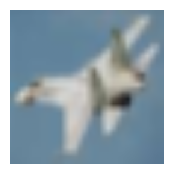

logits: tensor([ 28.4206, -13.9807,   6.6347,  -1.9783,   9.1473,  -2.2799,   5.7235,
        -13.8132,   7.5786, -18.9116], device='cuda:0',
       grad_fn=<SelectBackward0>)
probabilities: tensor([1.0000e+00, 3.8489e-19, 3.4556e-10, 6.2793e-14, 4.2632e-09, 4.6447e-14,
        1.3892e-10, 4.5508e-19, 8.8804e-10, 2.7791e-21], device='cuda:0',
       grad_fn=<SelectBackward0>)
predicted class: plane
label: plane


In [6]:
#CIFAR labels to human readable labels
CIFAR10_CLASSES = [
    'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]
data = next(iter(test_loader))
images, labels = data

# Check the shape of the images and labels
print(f'Images shape: {images.shape}')
print(f'Labels shape: {labels.shape}')
def imshow(img):
    npimg = img.numpy()
    plt.figure(figsize=(2, 2))  # keep this small to avoid blur
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')  # no interpolation
    plt.axis('off')
    plt.show()

idx = 10
imshow(images[idx])

images = images.to(device)
y = model(images) # B, num_classes
print(f"logits: {y[idx]}")
pred = torch.nn.functional.softmax(y, dim=1) # B, num_classes
print(f"probabilities: {pred[idx]}")
pred = torch.argmax(pred, dim=1) # B
print(f"predicted class: {CIFAR10_CLASSES[pred[idx]]}")

print(f"label: {CIFAR10_CLASSES[labels[idx].item()]}")


